<a href="https://colab.research.google.com/github/ParthPatki/COE379L_P2/blob/main/pap2389_COE_PA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - COE 379L

 LLM Use - I used an LLM to add comments to my code and to format it as I was having an issue where I used both tabs and spaces on accident

## Part 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset and load it into a DataFrame
dataset_path = "california_housing.csv"
housing_data = pd.read_csv(dataset_path)

# Output dataset summary and preview initial records
summary_info = housing_data.info()
initial_rows = housing_data.head()

# Display the information and sample rows
print(summary_info)
print(initial_rows)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.1827      26.0  4.521429   0.921429       305.0  2.178571     40.05   
1  3.0755      32.0  4.623068   0.983353      3868.0  4.599287     32.77   
2  1.8235      40.0  4.701149   1.126437       928.0  3.555556     37.

In [5]:
# Display the dimensions and total elements of the dataset
print(f"Dimensions: {housing_data.shape}")
print(f"Total elements: {housing_data.size}")


# Output the data types for each column
print(f"Column Data Types:\n{housing_data.dtypes}")

# Identify the number of duplicated records
num_duplicates = housing_data.duplicated().sum()

# Generate statistical overview of the dataset
summary_statistics = housing_data.describe()

# Present the results
print(f"Duplicate Records: {num_duplicates}")
print("Statistical Summary:")
print(summary_statistics)


Dimensions: (20634, 9)
Total elements: 185706
Column Data Types:
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object
Duplicate Records: 0
Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.0

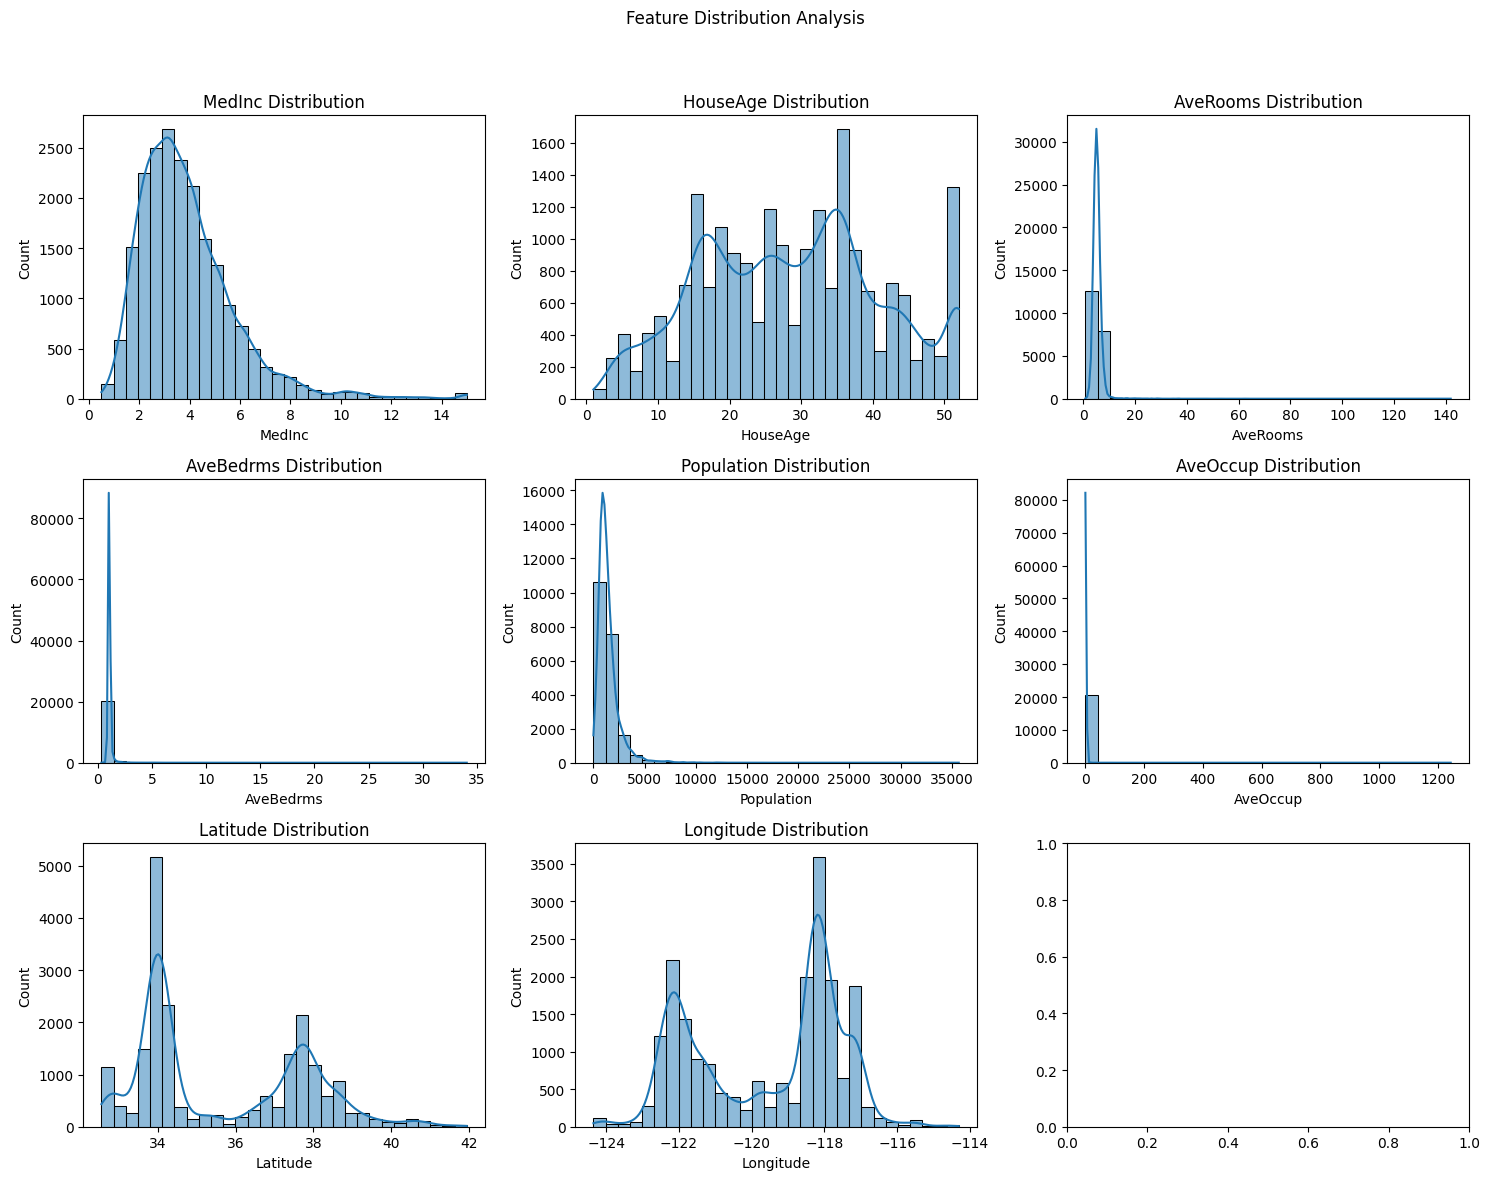

In [6]:
# Set up the subplot grid for histograms
figure, axis_grid = plt.subplots(3, 3, figsize=(15, 12))
figure.suptitle("Feature Distribution Analysis")

# Select features (excluding the last column)
numeric_features = housing_data.columns[:-1]
axis_grid = axis_grid.flatten()

# Plot histograms for each numeric feature
for idx, feature in enumerate(numeric_features):
    sns.histplot(housing_data[feature], bins=30, kde=True, ax=axis_grid[idx])
    axis_grid[idx].set_title(f"{feature} Distribution")

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##Part 2

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separating features and target variable
features = housing_data.drop(columns=["price_above_median"])
target = housing_data["price_above_median"]

# Splitting the data with stratification to maintain target balance
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Standardizing feature data for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining classification models
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
}

# Storing model evaluation metrics and confusion matrices
performance_metrics = {}
confusion_matrices = {}

for model_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    performance_metrics[model_name] = classification_report(y_test, predictions, output_dict=True)
    confusion_matrices[model_name] = confusion_matrix(y_test, predictions)

# Convert the performance metrics into a DataFrame for better visualization
metrics_df = pd.DataFrame(performance_metrics).T

# Display performance metrics for all models
print("Classification Performance Summary:")
print(metrics_df)

# Display the confusion matrices for each model
print("\nConfusion Matrices:")
for model_name, matrix in confusion_matrices.items():
    print(f"\n{model_name} Confusion Matrix:\n{matrix}")


Classification Performance Summary:
                                                              0  \
KNN           {'precision': 0.8261083743842365, 'recall': 0....   
DecisionTree  {'precision': 0.8489065606361829, 'recall': 0....   
RandomForest  {'precision': 0.8888888888888888, 'recall': 0....   
AdaBoost      {'precision': 0.8505859375, 'recall': 0.843992...   

                                                              1  accuracy  \
KNN           {'precision': 0.8154506437768241, 'recall': 0....  0.820693   
DecisionTree  {'precision': 0.8316784869976359, 'recall': 0....  0.840078   
RandomForest  {'precision': 0.8843373493975903, 'recall': 0....    0.8866   
AdaBoost      {'precision': 0.8451178451178452, 'recall': 0....  0.847831   

                                                      macro avg  \
KNN           {'precision': 0.8207795090805303, 'recall': 0....   
DecisionTree  {'precision': 0.8402925238169094, 'recall': 0....   
RandomForest  {'precision': 0.88661311914